In [1]:
import numpy as np
from scipy.special import erf
import os
import sys
import time
import copy
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)

from estimator.Laplace import LaplaceEstimator
from analysis.commons import batch_estimator_estimated_delta, compute_bootstrap_range
from utils.constants import WORKERS

In [2]:
def generate_default_configuration():
    epsilon = 1
    claimed_epsilon = 1
    gamma = 0.01

    dataset_settings = {
        'database_0': [0],
        'database_1': [1],
        'sensitivity': 1.,
        'epsilon': epsilon,
        'claimed_epsilon': claimed_epsilon,
        'delta': 0.00001
    }

    kwargs = {
        'dataset_settings': dataset_settings, 
        'gamma': gamma,
        'training_set_size': 10**7, 'validation_set_size': 10**6
    }
    return kwargs

def store_array_str(data_array):
    converted_str = np.array_str(data_array)
    converted_str = converted_str.replace(' ',',')
    return converted_str

In [3]:
logfile_path = os.path.join(log_dir, 'NN-Laplace-default.log')

logging.basicConfig(
        level=logging.INFO,
        format="%(asctime)s %(message)s",
        handlers=[
            logging.FileHandler(logfile_path),
            # logging.StreamHandler()
        ]
    )

logging.info('Initialize the experimental settings')
kwargs = generate_default_configuration()

In [ ]:
claimed_epsilon_list = np.arange(0.01, 0.2, 0.02)
d = 50
kwargs['dataset_settings']['database_0'] = [0]*d
kwargs['dataset_settings']['database_1'] = [1.0/d]*d

file_name = "/tmp/Laplace_NN"
estimated_delta_list = []

for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    estimator = LaplaceEstimator(kwargs)
    classifier_args = {"n_epoch": 50, "batch_size": 500, "lr": 0.00001, "n_batches": 100, "model": None}
    estimator.parallel_build(classifier="NeuralNetwork", file_name=file_name, workers=50, classifier_args=classifier_args)
    logging.info(estimator.output_)
    estimated_delta_list.append(estimator.output_['estimated_delta'])

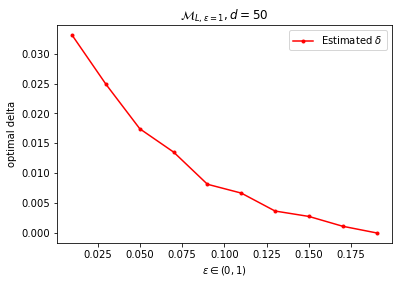

In [9]:
figfile_path = os.path.join(fig_dir, 'Laplace_kd.png')

plt.title(r'$\mathcal{M}_{L, \epsilon=1}, d=50$')
plt.xlabel(r"$\epsilon \in (0, 1)$")
plt.ylabel("optimal delta")

plt.plot(claimed_epsilon_list, estimated_delta_list , linestyle='-', marker='.', color ="red", label=r"Estimated $\delta$")
plt.legend(loc='upper right')
plt.savefig(figfile_path, bbox_inches = 'tight', dpi = 150);
plt.show()